In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style= "white" , color_codes=True)

In [2]:
data= pd.read_csv("D:/machine learning casestudies/Bank-Marketing-Project/bank.csv")
data= data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [5]:
print("job:", data['job'].unique())
print("marital:", data['marital'].unique())
print("education:", data['education'].unique())
print("default:", data['default'].unique())
print("housing:", data['housing'].unique())
print("loan:", data['loan'].unique())
print("contact:", data['contact'].unique())
print("month:", data['month'].unique())
print("day_of_week:", data['day_of_week'].unique())
print("poutcome:", data['poutcome'].unique())

job: ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
default: ['unknown' 'no' 'yes']
housing: ['yes' 'no' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['cellular' 'telephone']
month: ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week: ['thu' 'fri' 'tue' 'mon' 'wed']
poutcome: ['nonexistent' 'success' 'failure']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [7]:
data['education']= np.where(data['education']=='basic.9y', 'Basic', data['education'])
data['education']= np.where(data['education']=='basic.6y', 'Basic', data['education'])
data['education']= np.where(data['education']=='basic.4y', 'Basic', data['education'])

In [8]:
print(data['education'].unique())

['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

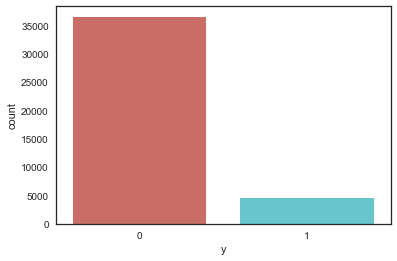

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription is", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription is 11.265417111780131


In [12]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
print(count_no_sub)
print(count_sub)

36548
4640


our classes are imbalanced, and the ratio of no-subscription is more then subscription i.e 89:11, so we need to balance the classes, lets do more exploration

In [13]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


# Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [14]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [15]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [16]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Visualization

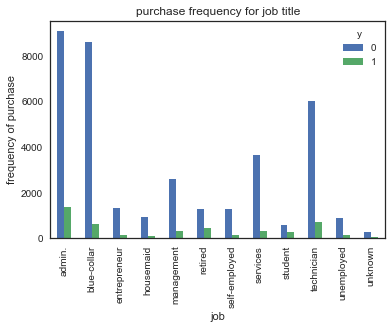

In [17]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('purchase frequency for job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

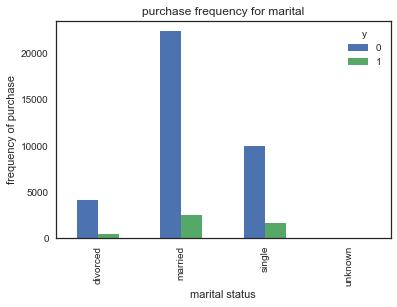

In [18]:
pd.crosstab(data.marital, data.y).plot(kind='bar')
plt.title('purchase frequency for marital')
plt.xlabel('marital status')
plt.ylabel('frequency of purchase')
plt.savefig('marital_vs_y')

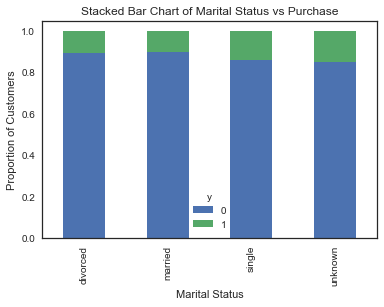

In [19]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.



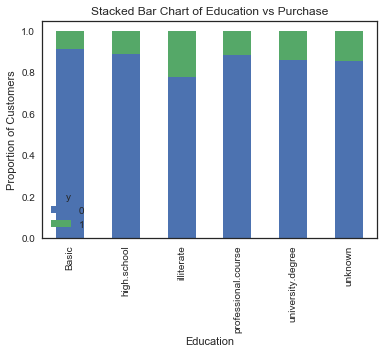

In [20]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.



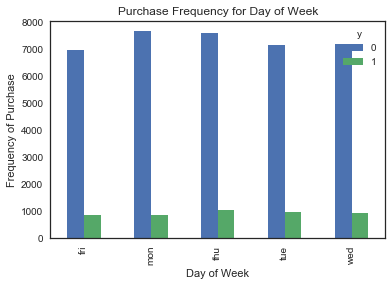

In [21]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome.



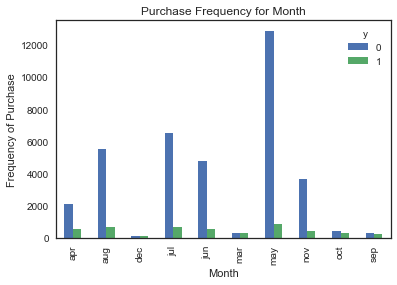

In [22]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.



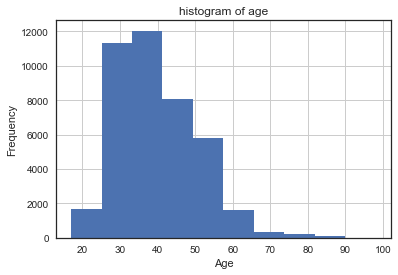

In [23]:
data.age.hist()
plt.title('histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

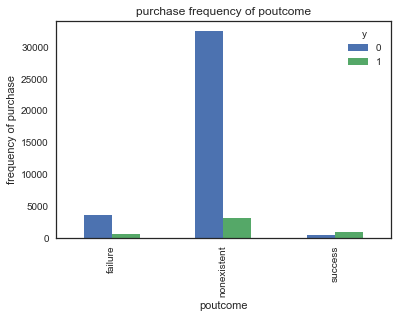

In [24]:
pd.crosstab(data.poutcome, data.y).plot(kind= 'bar')
plt.title('purchase frequency of poutcome')
plt.xlabel('poutcome')
plt.ylabel('frequency of purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.


# Create dummy variables
That is variables with only two values, zero and one.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

# Create dummy variables

This is a variable with two values only either zero or one

In [26]:
cat_vars= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list= 'var' + '_' + var
    cat_list= pd.get_dummies(data[var] , prefix= var)
    data1= data.join(cat_list)
    data= data1

cat_vars= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars= data.columns.values.tolist()
to_keep= [ i for i in data_vars if i not in cat_vars]

In [27]:
#our final data columns 
data_final= data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [28]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [29]:
data_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

# over sampling using SMOTE
with our training data created, i will sample up no subscription using the smote algoritm (synthetic minority oversampling technique). at a high level, SMOTE:
1. works by creating synthetic samples from the minor samples( no-subscription) instead of creating copies
2. randomly choosing one of the k-nearest-neighbors and using it to create similar, but randomly tweaked, new observation

we are going to implement SMOTE in python:

In [30]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE
os= SMOTE(random_state=0)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)
columns= X_train.columns

In [31]:
os_data_X, os_data_y= os.fit_sample(X_train, y_train)
os_data_X= pd.DataFrame(data= os_data_X, columns= columns)
os_data_y=pd.DataFrame(data=os_data_y, columns= ['y'])

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# we can check the numbers of our data
print("length of oversampled data :", len(os_data_X))

print("Number of subscription is oversampled :", len(os_data_y[os_data_y['y']==0]))

print("Number of subscription is",len(os_data_y[os_data_y['y']==1]))

print("Proportion of no subscription data over oversampled data :", len(os_data_y[os_data_y['y']==0])/ len(os_data_X))

print("Proportion of subscription data over oversampled data :", len(os_data_y[os_data_y['y']==1])/ len(os_data_X))

length of oversampled data : 51134
Number of subscription is oversampled : 25567
Number of subscription is 25567
Proportion of no subscription data over oversampled data : 0.5
Proportion of subscription data over oversampled data : 0.5


Now we have a perfect balanced data! You may have noticed that I
over-sampled only on the training data, because by oversampling only
on the training data, none of the information in the test data is being
used to create synthetic observations, therefore, no information will
bleed from test data into the model training.

# Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly
construct a model and choose either the best or worst performing
feature, setting the feature aside and then repeating the process with
the rest of the features. This process is applied until all features in the
dataset are exhausted. The goal of RFE is to select features by
recursively considering smaller and smaller sets of features.

In [33]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
rfe= RFE(logreg, 20)
rfe= rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False False False False False False  True False False  True
 False  True False False  True  True False  True False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True False False False False
  True  True  True  True  True False False False False False  True False
  True]
[37 35 24 38  7 10 20 33  1 31  5  1  4  1  2 30  1  1 27  1  3  8 17 18
 13  1 11 15  1 14 19 16  1  1 42 25 39 34 29 36 32  1  1  1  6 23 40 22
  1  1  1  1  1 28  9 26 41 21  1 12  1]


The RFE has helped us select the following features: “euribor3m”,
“job_blue-collar”, “job_housemaid”, “marital_unknown”,
“education_illiterate”, “default_no”, “default_unknown”,
“contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”,
“month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”,
“month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [34]:
cols= ['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success']
cols

['euribor3m',
 'job_blue-collar',
 'job_housemaid',
 'marital_unknown',
 'education_illiterate',
 'default_no',
 'default_unknown',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'poutcome_failure',
 'poutcome_success']

In [35]:
os_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [36]:
X=os_data_X[cols]
y=os_data_y['y']

# Implementing the model

In [37]:
import statsmodels.api as sm
model= LogisticRegression(fit_intercept= False)
mdl= model.fit(X,y)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
model.coef_

array([[-0.46378832, -0.1772447 , -0.32444652,  0.71140486,  1.10009454,
         1.14379039,  0.88365697,  1.02912107,  0.96211399, -0.79381042,
        -0.64661497, -0.37018363, -0.36167167, -0.43829206,  0.69759592,
        -1.43146319, -0.78549869,  0.54157543, -0.49955185,  1.57467891]])

In [39]:
#output from statsmodel
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit= sm.Logit(y,X)
result= logit.fit()
print(result.summary())

         Current function value: 0.545904
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51114
Method:                           MLE   Df Model:                           19
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                  0.2124
Time:                        16:05:11   Log-Likelihood:                -27914.
converged:                      False   LL-Null:                       -35443.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
euribor3m               -0.4634      0.009    -50.942      0.000      -0.481      -0.446
job_blue-collar         -0.1772    

C:\Users\praveen330\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for most of the variables are smaller than 0.05, except
four variables, therefore, we will remove them.

In [40]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

In [41]:
#removed the columns where p value is greater then 0.05
X.columns

Index(['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown',
       'education_illiterate', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [42]:
# again repeating the model after removing few columns where p value greater then 0.05
logit= sm.Logit(y,X)
result= logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51118
Method:                           MLE   Df Model:                           15
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                  0.1980
Time:                        16:05:12   Log-Likelihood:                -28425.
converged:                       True   LL-Null:                       -35443.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
euribor3m               -0.4488      0.007    -60.684      0.000      -0.463      -0.434

# Logistic Regression Model Fitting

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3 )
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the test set results and calculating the accuracy

In [44]:
y_pred= logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set:", logreg.score(X_test, y_test) )

Accuracy of logistic regression classifier on test set: 0.7316341829085458


# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6105 1593]
 [2524 5119]]


In [46]:
#The result is telling us that we have 6124+5170 correct predictions and 2505+1542 incorrect predictions.
(6114+5177)/(6114+1489+2561+5177)

0.7360015644351737

# Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true
positives and fp the number of false positives. The precision is
intuitively the ability of the classifier to not label a sample as positive if
it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true
positives and fn the number of false negatives. The recall is intuitively
the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of
the precision and recall, where an F-beta score reaches its best value at
1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor
of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7698
           1       0.76      0.67      0.71      7643

   micro avg       0.73      0.73      0.73     15341
   macro avg       0.74      0.73      0.73     15341
weighted avg       0.73      0.73      0.73     15341



Interpretation: Of the entire test set, 74% of the promoted term
deposit were the term deposit that the customers liked. Of the entire
test set, 74% of the customer’s preferred term deposits that were
promoted.

# ROC Curve

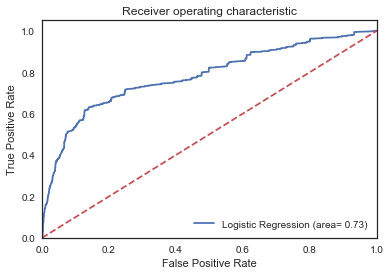

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc= roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Logistic Regression (area= %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc= "lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common
tool used with binary classifiers. The dotted line represents the ROC
curve of a purely random classifier; a good classi􀁢er stays as far away
from that line as possible (toward the top-left corner).
The Jupyter notebook used to make this post is available here. I would
be pleased to receive feedback or questions on any of the above.